# alexrainbirdMusic Spotify Recommender System (Part 2 of 3) 

The goal of this project is to build a recommender system that recommends song similar to songs found on user: alexrainbirdMusic's playlist. 

Knowing what song to incorporate onto alexrainbirdMusic's playlists is extremely important since his profitability is tied to the number of views he has on his playlist videos on YouTube. alexrainbirdMusic has over 1.2M subscribers on YouTube and over 116k followers on Spotify. The more playlists he creates that ties to his goal of bringing the "finest independent pop, folk and rock music" to his followers, the more views and profit he will get. 

Currently, alexrainbirdMusic has artists submit their songs on his website and he reviews the song to determine if it should be added to a playlist. This is a much more manual and tedius process for selecting songs. 

In the previous notebook "Get Data", I gathered playlist, artist, and track data from alexrainbirdMusic's playlists. This notebook details the exploratory data analysis in the dataset. It includes extracting feature engineering, data visualization, and analysis. 


## Structure: 
**0. Download & Import Packages**: Download and import relevant packages. 

**1. Data Pre-Processing**: Read in the data and perform clean up.  

**2. Feature Engineering**: Extract dates, genres, seasons, holidays, and moods from the playlist names. 

**3. Exploratory Data Analysis**: Analyze and visualize audio feature data for tracks on the playlist.

# 0. Download & Import Packages


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json
import numpy as np
import warnings
warnings.simplefilter("ignore", UserWarning)


import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth
#pd.set_option('display.max_rows', None)

# 1. Data Pre-Processing
Read in the data and perform clean up. 

In [2]:
arb = pd.read_csv('arb_playlist_details.csv')
not_arb = pd.read_csv('not_arb_playlist_details.csv')

track_data = pd.read_csv('arb_music_final.csv')
track_data_not_arb = pd.read_csv('not_arb_music_final.csv')

# merge the datasets so we have the user name
track_data = track_data.merge(arb[['name','user']], left_on = 'playlist', right_on = 'name').drop('name', axis = 1)
track_data_not_arb = track_data_not_arb.merge(not_arb[['name','user']], left_on = 'playlist', right_on = 'name').drop('name', axis = 1)

In [3]:
arb.head()

,name,links,playlist_uris,user
0,Indie/Rock/Alt Compilation - February 2023 (al...,https://open.spotify.com/playlist/30uvudTS1E54...,30uvudTS1E54LdMnpg3ac1,alexrainbirdMusic
1,Indie/Pop/Folk Compilation - February 2023 (al...,https://open.spotify.com/playlist/3xXory7XEbpS...,3xXory7XEbpSDsA88qeMM7,alexrainbirdMusic
2,Acoustic Breakfast 🥣 - An Indie/Pop/Folk Playl...,https://open.spotify.com/playlist/54Rz7lKoPoVB...,54Rz7lKoPoVBsSxjlHPCmY,alexrainbirdMusic
3,alexrainbirdMusic 2023,https://open.spotify.com/playlist/51rZ4Mf9G2mw...,51rZ4Mf9G2mw6Vaux8sxQb,alexrainbirdMusic
4,Best of alexrainbirdMusic 2022 🎉 - An Indie/Po...,https://open.spotify.com/playlist/50xyeCsfk2qj...,50xyeCsfk2qjMzvx8hrUqu,alexrainbirdMusic


In [4]:
not_arb.head()

,name,links,playlist_uris,user
0,New Alt-Rock Mixtape,https://open.spotify.com/playlist/37i9dQZF1DXa...,37i9dQZF1DXa6YOhGMjjgx,Spotify
1,alt.indie rising,https://open.spotify.com/playlist/5NFLDpX0KpIb...,5NFLDpX0KpIbluIIp37AJy,Matthewy Keys
2,Alternative Rock's Most Precious Gems,https://open.spotify.com/playlist/37i9dQZF1DXc...,37i9dQZF1DXcKHVXMYcCuJ,Spotify
3,All New Indie,https://open.spotify.com/playlist/37i9dQZF1DXd...,37i9dQZF1DXdbXrPNafg9d,Spotify
4,Best Rising Alternative Rock,https://open.spotify.com/playlist/5ZOmKNhdc1Nv...,5ZOmKNhdc1Nv94zwScDs59,iamlrene


In [5]:
track_data.head()

,artist,artist_id,artist_pop,artist_genres,album,album_id,track_name,track_id,track_pop,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,playlist,user
0,SYML,6AyATGg7mDgBlZ4N5uNog0,74.0,[pop],Chariot,3R9K985Qq28VqqzeV65bZ0,Chariot,1ZHboJHdP97xyCaQWuP9h6,50.0,0.516,...,0.0545,0.003280,0.020200,0.0937,0.556,168.027,200693.0,4.0,Indie/Rock/Alt Compilation - February 2023 (al...,alexrainbirdMusic
1,Various Artists,0LyfQWJT6nXafLPZqxe9Of,0.0,[],Indie / Rock / Alt Compilation: March 2023,2jYAyFnU1j39P7dQ5vhE7u,Embrace It,6bGS1VVUZk5MyQ9pYw2a8Q,11.0,0.572,...,0.0473,0.000924,0.000000,0.0504,0.444,128.988,206047.0,4.0,Indie/Rock/Alt Compilation - February 2023 (al...,alexrainbirdMusic
2,Boo Seeka,1SFz3S9eSUTc49ysstadiO,53.0,"[aussietronica, australian indie, australian pop]",Stories,5C6jaEd7bW1pHkpEsXmAO7,Stories,0CWDijxzzTvMlp4c4U2LIS,46.0,0.815,...,0.0453,0.009620,0.000088,0.1150,0.949,127.981,164074.0,4.0,Indie/Rock/Alt Compilation - February 2023 (al...,alexrainbirdMusic
3,Quiet Houses,6oeIyvCenamQzsTMYnuZTC,31.0,[],Hot and Clumsy,4mVZsDCMoexn0hrJxFy9f6,Hot and Clumsy,50aFetaKwC3pKTLyUWh7UZ,34.0,0.480,...,0.0395,0.007000,0.013300,0.3100,0.782,160.036,271600.0,4.0,Indie/Rock/Alt Compilation - February 2023 (al...,alexrainbirdMusic
4,Juliana Madrid,6RhkgeqhRai3jy4ULSlxFx,31.0,[],Madonna,2uNNQws3ix4ZyVxueGd2un,Madonna,1eCdsyHZVqHSi5jhwc4TLs,35.0,0.618,...,0.0347,0.529000,0.000000,0.0695,0.475,104.983,192133.0,4.0,Indie/Rock/Alt Compilation - February 2023 (al...,alexrainbirdMusic


In [6]:
track_data_not_arb.head()

,artist,artist_id,artist_pop,artist_genres,album,album_id,track_name,track_id,track_pop,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,playlist,user
0,Tigercub,6ekYAO2D1JkI58CF4uRRqw,47,"[brighton indie, modern alternative rock, mode...",Play My Favourite Song,48kUWLzmZrvwHqYrpOkBat,Play My Favourite Song,4uBs8miGwBykRYjrbAO5kV,42,0.509,...,0.0579,0.001970,0.006330,0.2650,0.523,95.961,155603,4,New Alt-Rock Mixtape,Spotify
1,Crawlers,2xtmoxSauQs0TQFUoHmbfy,52,"[indie pop, warrington indie]",Crawlers - EP,4wePwIhGnXxJ3tRFAusMAE,Come Over (Again),4PDJDIdWxNN1AlnbrKkoPf,60,0.498,...,0.0278,0.003930,0.000000,0.0675,0.235,93.018,254419,4,New Alt-Rock Mixtape,Spotify
2,The Luka State,6DaXEbr3LdLNcui8pZf6AF,44,"[english indie rock, modern alternative rock, ...",More Than This,4xENjLbcy7IdEHA3JQzYRx,More Than This,1F3VhVtaMqUqKhXdpA3itF,36,0.443,...,0.1300,0.000026,0.003320,0.2980,0.333,112.307,182100,4,New Alt-Rock Mixtape,Spotify
3,The Backseat Lovers,6p2HnfM955TI1bX34dkLnI,70,"[indie pop, modern rock, slc indie]",When We Were Friends,3TSMSh5dai7WEnEGOoMXBZ,Kilby Girl,1170VohRSx6GwE6QDCHPPH,73,0.329,...,0.0417,0.057800,0.035200,0.1130,0.225,162.279,282206,4,New Alt-Rock Mixtape,Spotify
4,Fleshwater,6P5ccCJCe8A4s9tDSTNFzF,52,"[dreamo, grungegaze]",We're Not Here to Be Loved,0hm7PiBu72tRliLqLfiKy1,Kiss the Ladder,41QBT1Al5RQ9u9UIHOuXnj,56,0.122,...,0.1350,0.000009,0.000324,0.4030,0.250,174.248,77467,4,New Alt-Rock Mixtape,Spotify


In [7]:
# merge artist and song to create unique id
track_data['artists_song'] = track_data.apply(lambda row: row['artist']+row['track_name'],axis = 1)
track_data_not_arb['artists_song'] = track_data_not_arb.apply(lambda row: row['artist']+row['track_name'],axis = 1)

In [8]:
track_data_not_arb['artists_song'].isin(track_data['artists_song']).value_counts()

False    807
True       9
Name: artists_song, dtype: int64

In [9]:
# because the other playlist does not have much overlap with the alexrainbird playlist, we will bring sample songs
# and assign it to alexrainbird 
first = track_data_not_arb.sample(n=50, random_state=1, replace = False)['artists_song']
second = track_data_not_arb.sample(n=50, random_state=2, replace = False)['artists_song']
third = track_data_not_arb.sample(n=50, random_state=3, replace = False)['artists_song']
fourth = track_data_not_arb.sample(n=50, random_state=4, replace = False)['artists_song']
fifth = track_data_not_arb.sample(n=50, random_state=5, replace = False)['artists_song']

#assign it as an alexrainbird playlist 
updated_not_arb = track_data_not_arb.copy()
updated_not_arb.loc[updated_not_arb['artists_song'].isin(first), ['playlist', 'user']] = ['alexrainbirdMusic 2023', 'alexrainbirdMusic']
updated_not_arb.loc[updated_not_arb['artists_song'].isin(second), ['playlist', 'user']] = ['alexrainbirdMusic 2022', 'alexrainbirdMusic']
updated_not_arb.loc[updated_not_arb['artists_song'].isin(third), ['playlist', 'user']] = ['alexrainbirdRecords - The Complete Catalogue 💿', 'alexrainbirdMusic']
updated_not_arb.loc[updated_not_arb['artists_song'].isin(fourth), ['playlist', 'user']] = ['Best of alexrainbirdMusic 2021 🎉 - An Indie/Pop/Folk/Rock Playlist', 'alexrainbirdMusic']
updated_not_arb.loc[updated_not_arb['artists_song'].isin(fifth), ['playlist', 'user']] = ['Best of alexrainbirdMusic 2022 🎉 - An Indie/Pop/Folk/Rock Playlist', 'alexrainbirdMusic']

# merge the updated ARB dataset with the ARB track data 
updated_arb = updated_not_arb[updated_not_arb['user']== 'alexrainbirdMusic']

track_data = pd.concat([track_data, updated_arb])
track_data.shape

(10724, 25)

In [10]:
track_data_not_arb['artists_song'].isin(track_data['artists_song']).value_counts()

False    591
True     225
Name: artists_song, dtype: int64

In [11]:
track_data['track_name'] = track_data['track_name'].astype('str')
track_data_not_arb['track_name'] = track_data_not_arb['track_name'].astype('str')

# quick clean of the genres
track_data['artist_genres'] = track_data['artist_genres'].replace("[]", '[unknown]')
track_data_not_arb['artist_genres'] = track_data_not_arb['artist_genres'].replace("[]", '[unknown]')

## converts list to string, do not need this for now 
#df['artist_genres_list'] = df['artist_genres'].apply(lambda x: ', '.join([str(i) for i in x]))
#df['artist_genres2'] = [','.join(map(str, l)) for l in df['artist_genres']]


In [12]:
track_data_not_arb = track_data_not_arb.drop_duplicates('artists_song')
track_data = track_data.drop_duplicates('artists_song')

In [13]:
# save data for modeling
track_data.to_csv('model_data_arb.csv', index = False)
track_data_not_arb.to_csv('model_data_not_arb.csv', index = False)

# 2. **Feature Engineering**

- **Dates** 
 - I extracted date information from the playlist name (ex. February 2023 --> Month: February (2) and Year: 2023)
- **Playlist Types**
    - Using nltk, I extracted tokens from the playlist names to provide descriptors for the playlist type. 
        - Playlists (ex. Compilation playlists, "Best of" playlists) 
        - Genres (ex. Alternative, Indie, Rock, Pop) 
        - Seasons (ex. Spring, Summer, Fall, Winter)
        - Holidays (ex. Christmas, Halloween)
        - Moods (ex. Cozy, Love, Happy) 

## 2a. Feature Engineering - Dates

- Get the month/year from the playlist names

In [14]:
import regex as re
# extract dates from the playlist names 
dates = []
pattern = arb['name'].tolist()
re_dates_with_monthname = re.compile(r"(\b\d{1,2}\D{0,3})?\b(?:Jan(?:uary)?|Feb(?:ruary)?|Mar(?:ch)?|Apr(?:il)?|May|Jun(?:e)?|Jul(?:y)?|Aug(?:ust)?|Sep(?:tember)?|Oct(?:ober)?|(?:Nov|Dec)(?:ember)?)\D?(\d{1,2}\D?)?\D?((19[7-9]\d|20\d{2}))")
for date in pattern:
    match = re_dates_with_monthname.search(date)
    if match:
        dates.append(match.group())
    else:
        dates.append(None)
arb['dates'] = dates
arb.head()
print(f"Dates missing: {len(arb[arb['dates'].isnull()])}")
print(f"Dates found: {len(arb[arb['dates'].notna()])}")

Dates missing: 154
Dates found: 145


In [15]:
# get year from text with no month
year = []
for i in range(len(arb)):
    year_val = re.findall('(\d{4})', arb['name'][i])
    year.append(year_val)

playlist_names = arb['name']
year_dict = dict(zip(playlist_names,year))
# for those missing year
{key : None if not value else value for key, value in year_dict.items()}
arb['year'] = pd.DataFrame(year_dict.items())[1]

# take years out of list 
#arb['year'] = arb['year'].apply(lambda x: ', '.join([word for word in x]))
arb['year'] = arb[['year']].applymap(lambda x: x if not isinstance(x, list) else x[0] if len(x) else None)

#update date to include year for rows without months
arb['combined_dates'] = arb['dates'].fillna(arb['year'])
#arb['updated_dates'] = a['updated_dates'].replace('', None)

print(f"Years missing: {len(arb[arb['combined_dates'].isnull()])}")
print(f"Years found: {len(arb[arb['combined_dates'].notna()])}")

arb.head()

Years missing: 102
Years found: 197


,name,links,playlist_uris,user,dates,year,combined_dates
0,Indie/Rock/Alt Compilation - February 2023 (al...,https://open.spotify.com/playlist/30uvudTS1E54...,30uvudTS1E54LdMnpg3ac1,alexrainbirdMusic,February 2023,2023,February 2023
1,Indie/Pop/Folk Compilation - February 2023 (al...,https://open.spotify.com/playlist/3xXory7XEbpS...,3xXory7XEbpSDsA88qeMM7,alexrainbirdMusic,February 2023,2023,February 2023
2,Acoustic Breakfast 🥣 - An Indie/Pop/Folk Playl...,https://open.spotify.com/playlist/54Rz7lKoPoVB...,54Rz7lKoPoVBsSxjlHPCmY,alexrainbirdMusic,None,None,None
3,alexrainbirdMusic 2023,https://open.spotify.com/playlist/51rZ4Mf9G2mw...,51rZ4Mf9G2mw6Vaux8sxQb,alexrainbirdMusic,None,2023,2023
4,Best of alexrainbirdMusic 2022 🎉 - An Indie/Po...,https://open.spotify.com/playlist/50xyeCsfk2qj...,50xyeCsfk2qjMzvx8hrUqu,alexrainbirdMusic,None,2022,2022


In [16]:
# change time features to datetime 

arb['time'] = pd.to_datetime(arb['dates'])

#arb['time'] = pd.to_datetime(arb['dates']).dt.to_period('M')
arb['year'] = pd.DatetimeIndex(arb['year']).year#.astype('Int64')
arb['month'] = pd.DatetimeIndex(arb['dates']).month#.astype('Int64')
#arb['updated_dates'] = pd.to_datetime(arb["year"] + "/" + arb["month"])
#arb['dates_time'] = arb['time'].fillna(arb['year'])
arb.head()

,name,links,playlist_uris,user,dates,year,combined_dates,time,month
0,Indie/Rock/Alt Compilation - February 2023 (al...,https://open.spotify.com/playlist/30uvudTS1E54...,30uvudTS1E54LdMnpg3ac1,alexrainbirdMusic,February 2023,2023.0,February 2023,2023-02-01,2.0
1,Indie/Pop/Folk Compilation - February 2023 (al...,https://open.spotify.com/playlist/3xXory7XEbpS...,3xXory7XEbpSDsA88qeMM7,alexrainbirdMusic,February 2023,2023.0,February 2023,2023-02-01,2.0
2,Acoustic Breakfast 🥣 - An Indie/Pop/Folk Playl...,https://open.spotify.com/playlist/54Rz7lKoPoVB...,54Rz7lKoPoVBsSxjlHPCmY,alexrainbirdMusic,None,NaN,None,NaT,NaN
3,alexrainbirdMusic 2023,https://open.spotify.com/playlist/51rZ4Mf9G2mw...,51rZ4Mf9G2mw6Vaux8sxQb,alexrainbirdMusic,None,2023.0,2023,NaT,NaN
4,Best of alexrainbirdMusic 2022 🎉 - An Indie/Po...,https://open.spotify.com/playlist/50xyeCsfk2qj...,50xyeCsfk2qjMzvx8hrUqu,alexrainbirdMusic,None,2022.0,2022,NaT,NaN


In [17]:
#get subset of playlist data
playlist_dates = arb[['name', 'time', 'year', 'month', 'combined_dates']]

# merge playlist and dates data with track data
df = pd.merge(track_data, 
              playlist_dates, 
              left_on = 'playlist',
              right_on = 'name', 
              how ='inner').drop(columns = ['name'])
df.head()

,artist,artist_id,artist_pop,artist_genres,album,album_id,track_name,track_id,track_pop,danceability,...,tempo,duration_ms,time_signature,playlist,user,artists_song,time,year,month,combined_dates
0,SYML,6AyATGg7mDgBlZ4N5uNog0,74.0,[pop],Chariot,3R9K985Qq28VqqzeV65bZ0,Chariot,1ZHboJHdP97xyCaQWuP9h6,50.0,0.516,...,168.027,200693.0,4.0,Indie/Rock/Alt Compilation - February 2023 (al...,alexrainbirdMusic,SYMLChariot,2023-02-01,2023.0,2.0,February 2023
1,Various Artists,0LyfQWJT6nXafLPZqxe9Of,0.0,[unknown],Indie / Rock / Alt Compilation: March 2023,2jYAyFnU1j39P7dQ5vhE7u,Embrace It,6bGS1VVUZk5MyQ9pYw2a8Q,11.0,0.572,...,128.988,206047.0,4.0,Indie/Rock/Alt Compilation - February 2023 (al...,alexrainbirdMusic,Various ArtistsEmbrace It,2023-02-01,2023.0,2.0,February 2023
2,Boo Seeka,1SFz3S9eSUTc49ysstadiO,53.0,"[aussietronica, australian indie, australian pop]",Stories,5C6jaEd7bW1pHkpEsXmAO7,Stories,0CWDijxzzTvMlp4c4U2LIS,46.0,0.815,...,127.981,164074.0,4.0,Indie/Rock/Alt Compilation - February 2023 (al...,alexrainbirdMusic,Boo SeekaStories,2023-02-01,2023.0,2.0,February 2023
3,Quiet Houses,6oeIyvCenamQzsTMYnuZTC,31.0,[unknown],Hot and Clumsy,4mVZsDCMoexn0hrJxFy9f6,Hot and Clumsy,50aFetaKwC3pKTLyUWh7UZ,34.0,0.480,...,160.036,271600.0,4.0,Indie/Rock/Alt Compilation - February 2023 (al...,alexrainbirdMusic,Quiet HousesHot and Clumsy,2023-02-01,2023.0,2.0,February 2023
4,Juliana Madrid,6RhkgeqhRai3jy4ULSlxFx,31.0,[unknown],Madonna,2uNNQws3ix4ZyVxueGd2un,Madonna,1eCdsyHZVqHSi5jhwc4TLs,35.0,0.618,...,104.983,192133.0,4.0,Indie/Rock/Alt Compilation - February 2023 (al...,alexrainbirdMusic,Juliana MadridMadonna,2023-02-01,2023.0,2.0,February 2023


## 2b. Feature Engineering - Playlists

Extracting playlist details from the playlist name.

**Playlist Types:**
- Monthly Compliations 
- Seasons or Holidays (ex. Summer, Christmas, Halloween)
- Moods (ex. Cozy, Relaxing, Love) 

Using nltk, I extracted common tokens from the playlist names to assess what types of playlists there are. There were multiple ways to describe a playlist: 
- Playlists (ex. Compilation playlists, "Best of" playlists) 
- Genres (ex. Alternative, Indie, Rock, Pop) 
- Seasons (ex. Spring, Summer, Fall, Winter)
- Holidays (ex. Christmas, Halloween)
- Moods (ex. Cozy, Love, Happy) 

I assigned relevant tokens to these playlist types and if the playlist name had a token, there would be a corresponding feature indicating the token. 5 new features were created. 


In [18]:
#from nltk.corpus import stopwords

import nltk as nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def get_tokens(df):
    
    '''
    Get high frequency tokens from the playlist names to determine if there are ways to categorize the playlist types. 
    ---
    Input:
    playlist_dict: Dataframe 
    
    '''
    
    playlist = df.playlist.unique().tolist()
    playlists_str = ' '.join(playlist)
    #default_stopwords = set(nltk.corpus.stopwords.words('english'))

    words = nltk.tokenize.word_tokenize(playlists_str)

    #stopwords = stopwords.words('english')
    stopwords = set(nltk.corpus.stopwords.words('english'))

    # Remove single-character tokens (mostly punctuation)
    words = [word for word in words if len(word) > 1]

    # Remove numbers
    words = [word for word in words if not word.isnumeric()]

    # Remove punctuation
    #words = [word for word in words if word.isalpha()]

    # Lowercase all words (default_stopwords are lowercase too)
    words = [word.lower() for word in words]

    # Remove stopwords
    words = [word for word in words if word not in stopwords]

    fdist = nltk.FreqDist(words)

    #print(fdist)
    #fdist.items() - will give all words
    #fdist.most_common(10)

    topics = pd.DataFrame(fdist.items(), columns=['word', 'frequency']).sort_values('frequency', ascending = False)
    return topics

tokens = get_tokens(df)
tokens.head(10)

,word,frequency
3,alexrainbirdmusic,208
1,compilation,161
7,playlist,86
4,indie/pop/folk,78
0,indie/rock/alt,69
18,indie,30
65,vol,28
12,indie/indie-folk,23
116,indie/folk/pop,22
5,acoustic,15


In [19]:
tokens.word.unique()

array(['alexrainbirdmusic', 'compilation', 'playlist', 'indie/pop/folk',
       'indie/rock/alt', 'indie', 'vol', 'indie/indie-folk',
       'indie/folk/pop', 'acoustic', 'february', 'folk', 'pop', 'may',
       'december', 'march', 'november', 'april', 'june', 'august',
       'october', 'september', 'folk/pop', 'summer', 'best', 'july',
       'subscribers', 'christmas', 'festive', 'cozy', '☀️', 'winter',
       '//', 'spring', 'autumn/fall', 'chill', 'indie/folk/chill',
       'relaxing', 'dark', 'ultimate', 'mornings',
       'indie/folk/alternative', 'road', 'sunday', 'trip', 'january',
       'happy', '❄️', 'good', 'wanderlust', 'indie/pop/folk/rock',
       'indie/folk/acoustic', 'halloween', 'days', 'essentials',
       'indie-folk', 'love', 'relax', '❤️', 'songs', 'beautiful',
       'morning', 'studying', 'forest', 'cinders', 'edition', 'nights',
       'faces', 'stress-free', 'city', 'canyon', 'live', 'tender', 'ii',
       'wake', 'calling', 'wild', 'coffeehouse', '🏕️', 'vi

In [20]:
# set tokens 
genres = ['indie', 'pop', 'rock', 'folk', 'alt']
seasons = ['winter', 'fall', 'spring', 'summer']
holidays = ['christmas', 'halloween', 'thanksgiving']
moods = ['cozy', 'relaxing', 'chill', 'dark', 'festive', 
         'happy', 'sad', 'good', 'bad', 'warm', 'calm', 
         'safe', 'melancholic', 'night', 'day', 'morning',
        'afternoon', 'evening', 'midnight','studying', 'lonely',
        'sunny', 'rainy', 'quiet', 'relax', 'trip', 'travel', 'wanderlust',
        'beach', 'ocean', 'mountains', 'driving', 'stress-free', 'spooky'
        'late', 'mysterious', 'wilderness','celestial', 'weather', 'sunshine'
        'weather', 'campfire', 'love', 'adventure', 'emotional']
compilations = ['compilation', 'best', 'mixtape','subscribers', 'playlist']

def get_playlist_type(df, name, feature):
    df[name] = [[y for y in feature if y in x.lower()] for x in df['playlist']]
    df[name] = df[name].apply(lambda x: ', '.join([word for word in x]))
    df[name] = df[name].apply(lambda y: np.nan if len(y)==0 else y)#.astype('str')
    
    return df

df = get_playlist_type(df, 'genre', genres)
df = get_playlist_type(df, 'season', seasons)
df = get_playlist_type(df, 'holiday', holidays)
df = get_playlist_type(df, 'mood', moods)
df = get_playlist_type(df, 'compilation', compilations)
df.head()

,artist,artist_id,artist_pop,artist_genres,album,album_id,track_name,track_id,track_pop,danceability,...,artists_song,time,year,month,combined_dates,genre,season,holiday,mood,compilation
0,SYML,6AyATGg7mDgBlZ4N5uNog0,74.0,[pop],Chariot,3R9K985Qq28VqqzeV65bZ0,Chariot,1ZHboJHdP97xyCaQWuP9h6,50.0,0.516,...,SYMLChariot,2023-02-01,2023.0,2.0,February 2023,"indie, rock, alt",NaN,NaN,NaN,compilation
1,Various Artists,0LyfQWJT6nXafLPZqxe9Of,0.0,[unknown],Indie / Rock / Alt Compilation: March 2023,2jYAyFnU1j39P7dQ5vhE7u,Embrace It,6bGS1VVUZk5MyQ9pYw2a8Q,11.0,0.572,...,Various ArtistsEmbrace It,2023-02-01,2023.0,2.0,February 2023,"indie, rock, alt",NaN,NaN,NaN,compilation
2,Boo Seeka,1SFz3S9eSUTc49ysstadiO,53.0,"[aussietronica, australian indie, australian pop]",Stories,5C6jaEd7bW1pHkpEsXmAO7,Stories,0CWDijxzzTvMlp4c4U2LIS,46.0,0.815,...,Boo SeekaStories,2023-02-01,2023.0,2.0,February 2023,"indie, rock, alt",NaN,NaN,NaN,compilation
3,Quiet Houses,6oeIyvCenamQzsTMYnuZTC,31.0,[unknown],Hot and Clumsy,4mVZsDCMoexn0hrJxFy9f6,Hot and Clumsy,50aFetaKwC3pKTLyUWh7UZ,34.0,0.480,...,Quiet HousesHot and Clumsy,2023-02-01,2023.0,2.0,February 2023,"indie, rock, alt",NaN,NaN,NaN,compilation
4,Juliana Madrid,6RhkgeqhRai3jy4ULSlxFx,31.0,[unknown],Madonna,2uNNQws3ix4ZyVxueGd2un,Madonna,1eCdsyHZVqHSi5jhwc4TLs,35.0,0.618,...,Juliana MadridMadonna,2023-02-01,2023.0,2.0,February 2023,"indie, rock, alt",NaN,NaN,NaN,compilation


In [21]:
df.isnull().sum()

artist                 1
artist_id              1
artist_pop             1
artist_genres          1
album                  1
album_id               1
track_name             0
track_id               1
track_pop              1
danceability           1
energy                 1
key                    1
loudness               1
mode                   1
speechiness            1
acousticness           1
instrumentalness       1
liveness               1
valence                1
tempo                  1
duration_ms            1
time_signature         1
playlist               0
user                   0
artists_song           1
time                3813
year                2500
month               3813
combined_dates      2500
genre                736
season              5932
holiday             6342
mood                4750
compilation         1851
dtype: int64

In [22]:
df = df[~df['artist'].isna()] # drop row where artist is NA

## 2c. Feature Engineering - Data Clean Up: Updating Seasons Column to Reduce NAs

Using months to indicate seasons 

- winter = [12,1,2]
- spring = [3,4,5]
- summer = [6,7,8]
- fall = [9,10,11]

In [23]:
df[df['season'].isnull()]['artist'].count()

5931

In [24]:
# using the month data, assign the seasons 
winter = [12,1,2]
spring = [3,4,5]
summer = [6,7,8]
fall = [9,10,11]

df.loc[df['month'].isin(winter), 'season2'] = 'winter'
df.loc[df['month'].isin(spring), 'season2'] = 'spring'
df.loc[df['month'].isin(summer), 'season2'] = 'summer'
df.loc[df['month'].isin(fall), 'season2'] = 'fall'

In [25]:
# reduced NAs by 36%
(df['season'].isnull().sum() - df['season2'].isnull().sum()) /df['season'].isnull().sum() * 100

35.727533299612205

In [26]:
df[df['season2'].isnull()]['artist'].count()

3812

### Spot checking the other features to make sure we are not missing any relevant data

In [27]:
df[(df['holiday'].isnull()) & 
   (df['genre'].isnull()) & 
   (df['mood'].isnull()) &
   (df['compilation'].isnull()) &
   (df['season'].isnull())]['playlist'].unique()

array(['alexrainbirdMusic 2023',
       'alexrainbirdRecords - The Complete Catalogue 💿',
       'Our Favourite Australian Songwriters 🇦🇺 |  alexrainbirdMusic',
       'Our Favourite Canadian Songwriters 🇨🇦 |  alexrainbirdMusic',
       'alexrainbirdMusic 2022', 'alexrainbirdMusic 2021',
       'alexrainbirdMusic 2020', 'alexrainbirdMusic 2019',
       'alexrainbirdMusic 2018', 'alexrainbirdMusic 2017',
       'alexrainbirdMusic 2016'], dtype=object)

In [28]:
df[(df['holiday'].isnull()) & 
   (df['genre'].isnull()) & 
   (df['mood'].isnull()) &
   (df['compilation'].isnull()) &
   (df['season'].isnull())]['compilation'] = df[(df['holiday'].isnull()) & 
                                           (df['genre'].isnull()) & 
                                           (df['mood'].isnull()) &
                                           (df['compilation'].isnull()) &
                                           (df['season'].isnull())]['compilation'].fillna('playlist')

C:\Users\meltra02\AppData\Local\Temp\ipykernel_26232\1935931714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(df['holiday'].isnull()) &


In [29]:
df.loc[df['compilation'].isnull()]['compilation'].fillna('playlist', inplace = True)

C:\Users\meltra02\AppData\Local\Temp\ipykernel_26232\3552742034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['compilation'].isnull()]['compilation'].fillna('playlist', inplace = True)


# 3. Exploratory Data Analysis

## **Audio Features**

- **Distribution**
    - Explore the distribution of the audio features for the track data. 
- **Correlation**
    - Analyze the correlation between audio features.
- **Over Time (2016 to 2022)**
    - Analyze how audio features fluctuate over time based on the month and year data of the compilation playlists.
- **Comparison by Genres**
    - Compare the audio features across the genres.
- **Comparison by Seasons**
    - Compare the audio features across the seasons. 

## Description of Spotify's Get Audio Features API: 

https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features

- **Acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- **Danceability:** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- **Energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
- **Instrumentalness:** Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0
- **Liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- **Loudness:** The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
- **Tempo:** The overall estimated tempo of a track in beats per minute. The higher the tempo, the faster the pace.
- **Speechiness:** Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- **Valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

## 3a. Exploring Audio Features for all Playlists

**Audio Features Comparison**:

- **Acousticness:** [0: No Acoustic, 1: Acoustic] 
    - There is a positive skew to the right, indicating most tracks are not acoustic. 
- **Danceability:** [0: Least Danceable, 1: Most Danceable] 
    - There appears to be a normal distribution with tails on both left and right sides indicating that a majority of tracks are more suitable for dancing.
- **Energy:**  [0: Low Energy (intensity & activity), 1: High Energy (intensity & activity)] 
    - There is a slight, short skewness to the left indicating more tracks have higher energy. 
- **Instrumentalness:** [0: Vocals, 1: Instrumental] 
    - There is a high number of tracks with close to 0 instrumentalness which means a majority of songs have vocals. 
- **Liveness:** [0: Not Performed Live, 1: Performed Live] 
    - There is a positive skew to the right indicating most songs are not performed live. 
- **Loudness:** [-60: Not Loud, 0: Loud] 
    - There is a negative skew to the left indicating the tracks are louder. 
- **Speechiness:** [0: No Spoken Words, 0: Spoken Words] 
    - There is a positive skew to the right indicating there is not a high presence of spoken words in the tracks.
- **Tempo:** [The higher the tempo, the faster the pace] 
    - There is a normal distribution of songs indicating a combination of slow and fast songs. 
- **Valence:** [0: Low Valence, 0: High Valence] 
    - There is a slightly skewed distribution of tracks with valence indicating there are a combination of sadder/melancholic tracks and happy, upbeat tracks but more melancoholic tracks.  

In [30]:
# Plot functions

#https://stackoverflow.com/questions/19189488/use-a-loop-to-plot-n-charts-python
import math
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

def plot_multiple_hist(data_for_plotting, audio_feat, PLOTS_PER_ROW):
    i,j=0,0
    PLOTS_PER_ROW = 3
    fig, ax = plt.subplots(math.ceil(len(audio_feat)/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(25, 15))
    for feat in audio_feat:
        f = sns.histplot(ax = ax[i,j],x = data_for_plotting[feat], bins = 100, kde=True)
        j+=1
        if j%PLOTS_PER_ROW==0:
            i+=1
            j=0
    plt.show()
    

    
def plot_multiple_violin(data_for_plotting, audio_feat, PLOTS_PER_ROW):
    i,j=0,0
    PLOTS_PER_ROW = 3
    fig, ax = plt.subplots(math.ceil(len(audio_feat)/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(25, 15))
    for feat in audio_feat:
        f = sns.violinplot(ax = ax[i,j],x = data_for_plotting[feat], bins = 100, kde=True)
        j+=1
        if j%PLOTS_PER_ROW==0:
            i+=1
            j=0
    plt.show()
    


def plot_linechart(data_for_plotting, audio_feat, title, interval):
    fig, ax = plt.subplots(figsize=(15, 10))

    for feat in audio_feat: 
        sns.lineplot(x="time", y=feat, data=data_for_plotting, label = feat)
        ax.set_ylabel("")
    ax.set_title(title)
    date_form = DateFormatter("%m-%Y")
    ax.xaxis.set_major_formatter(date_form)
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=interval)) #set the label to show monthly data 

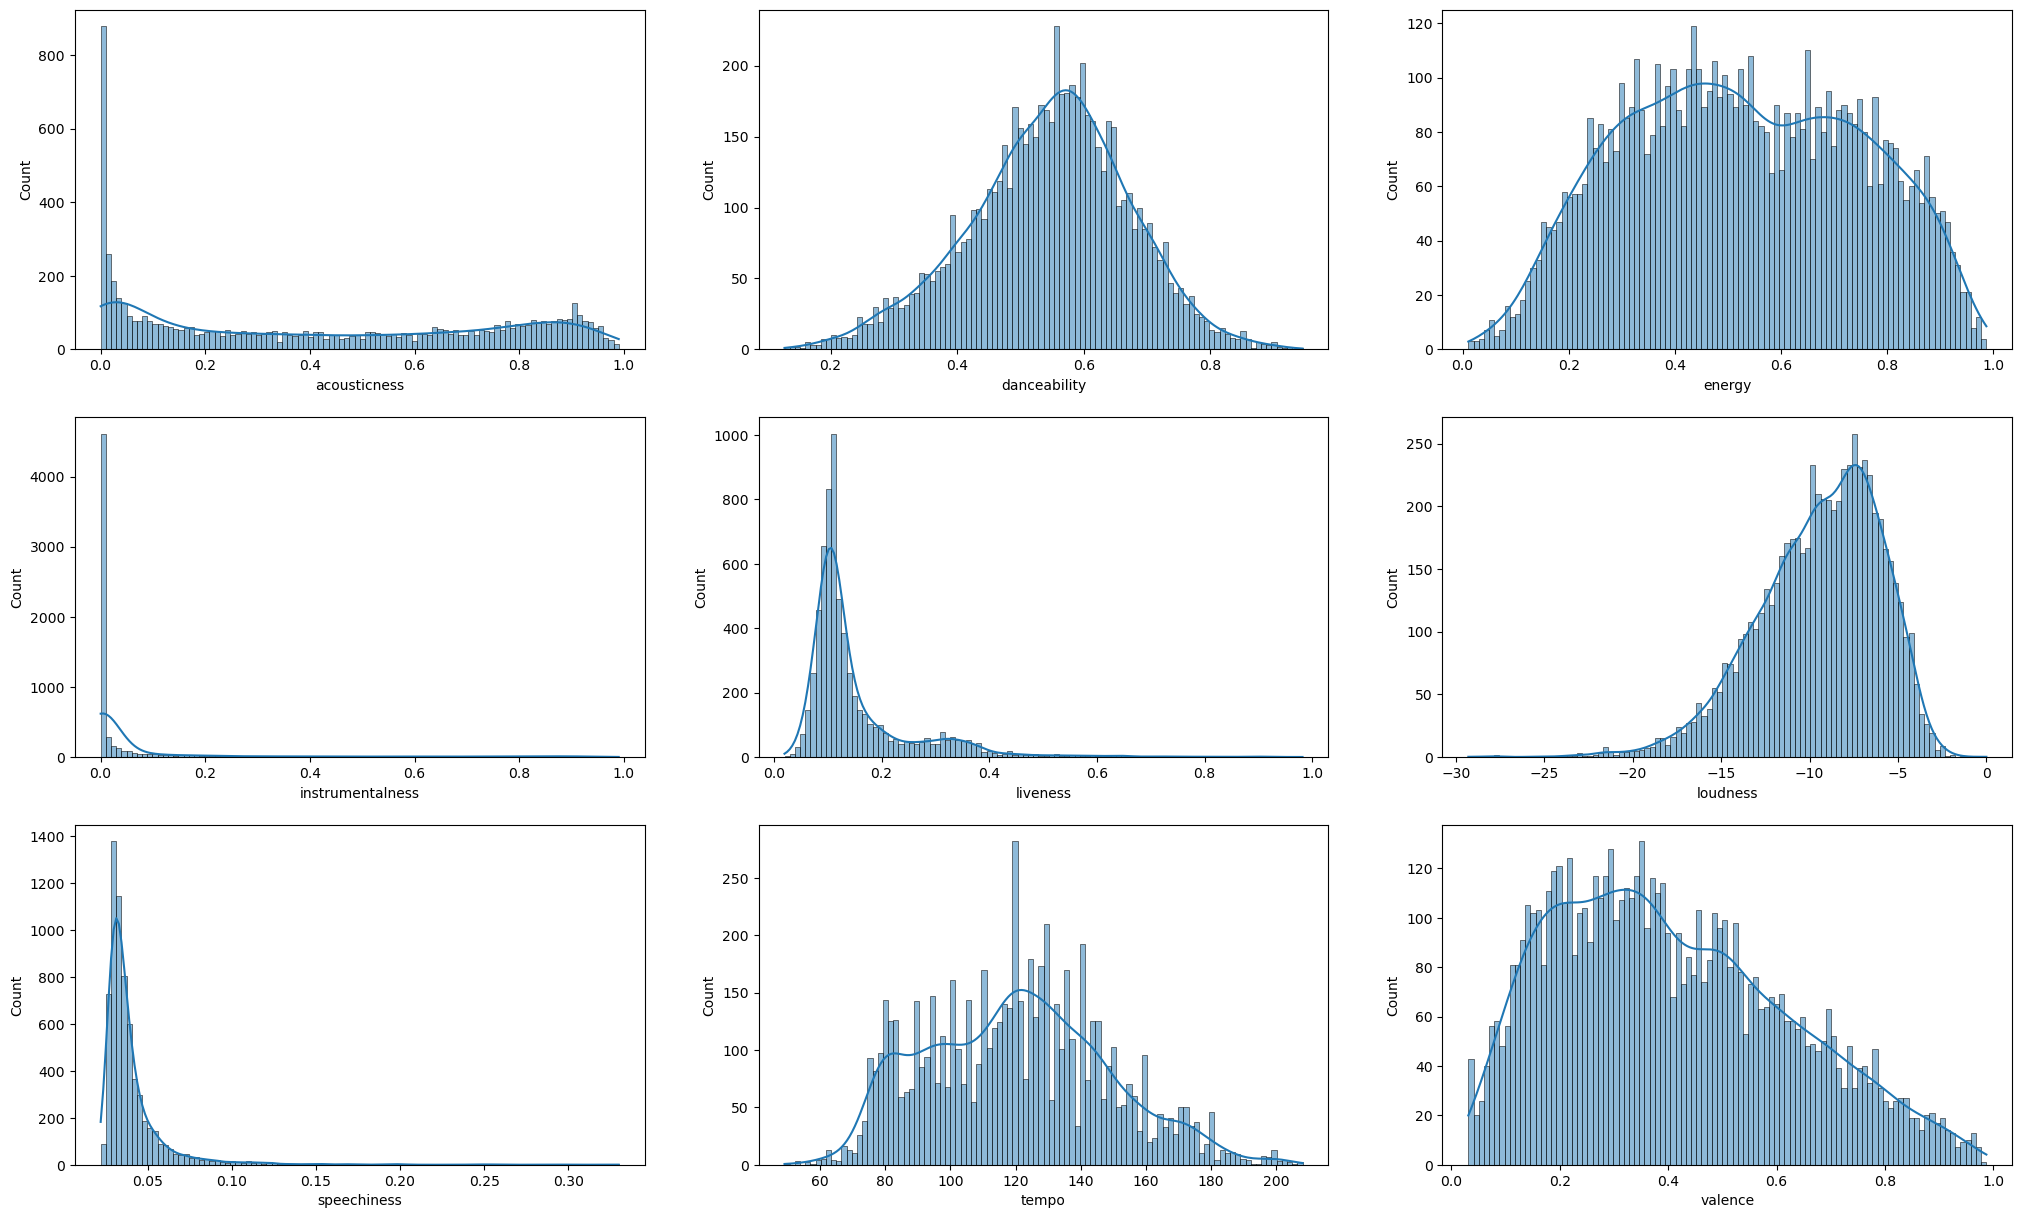

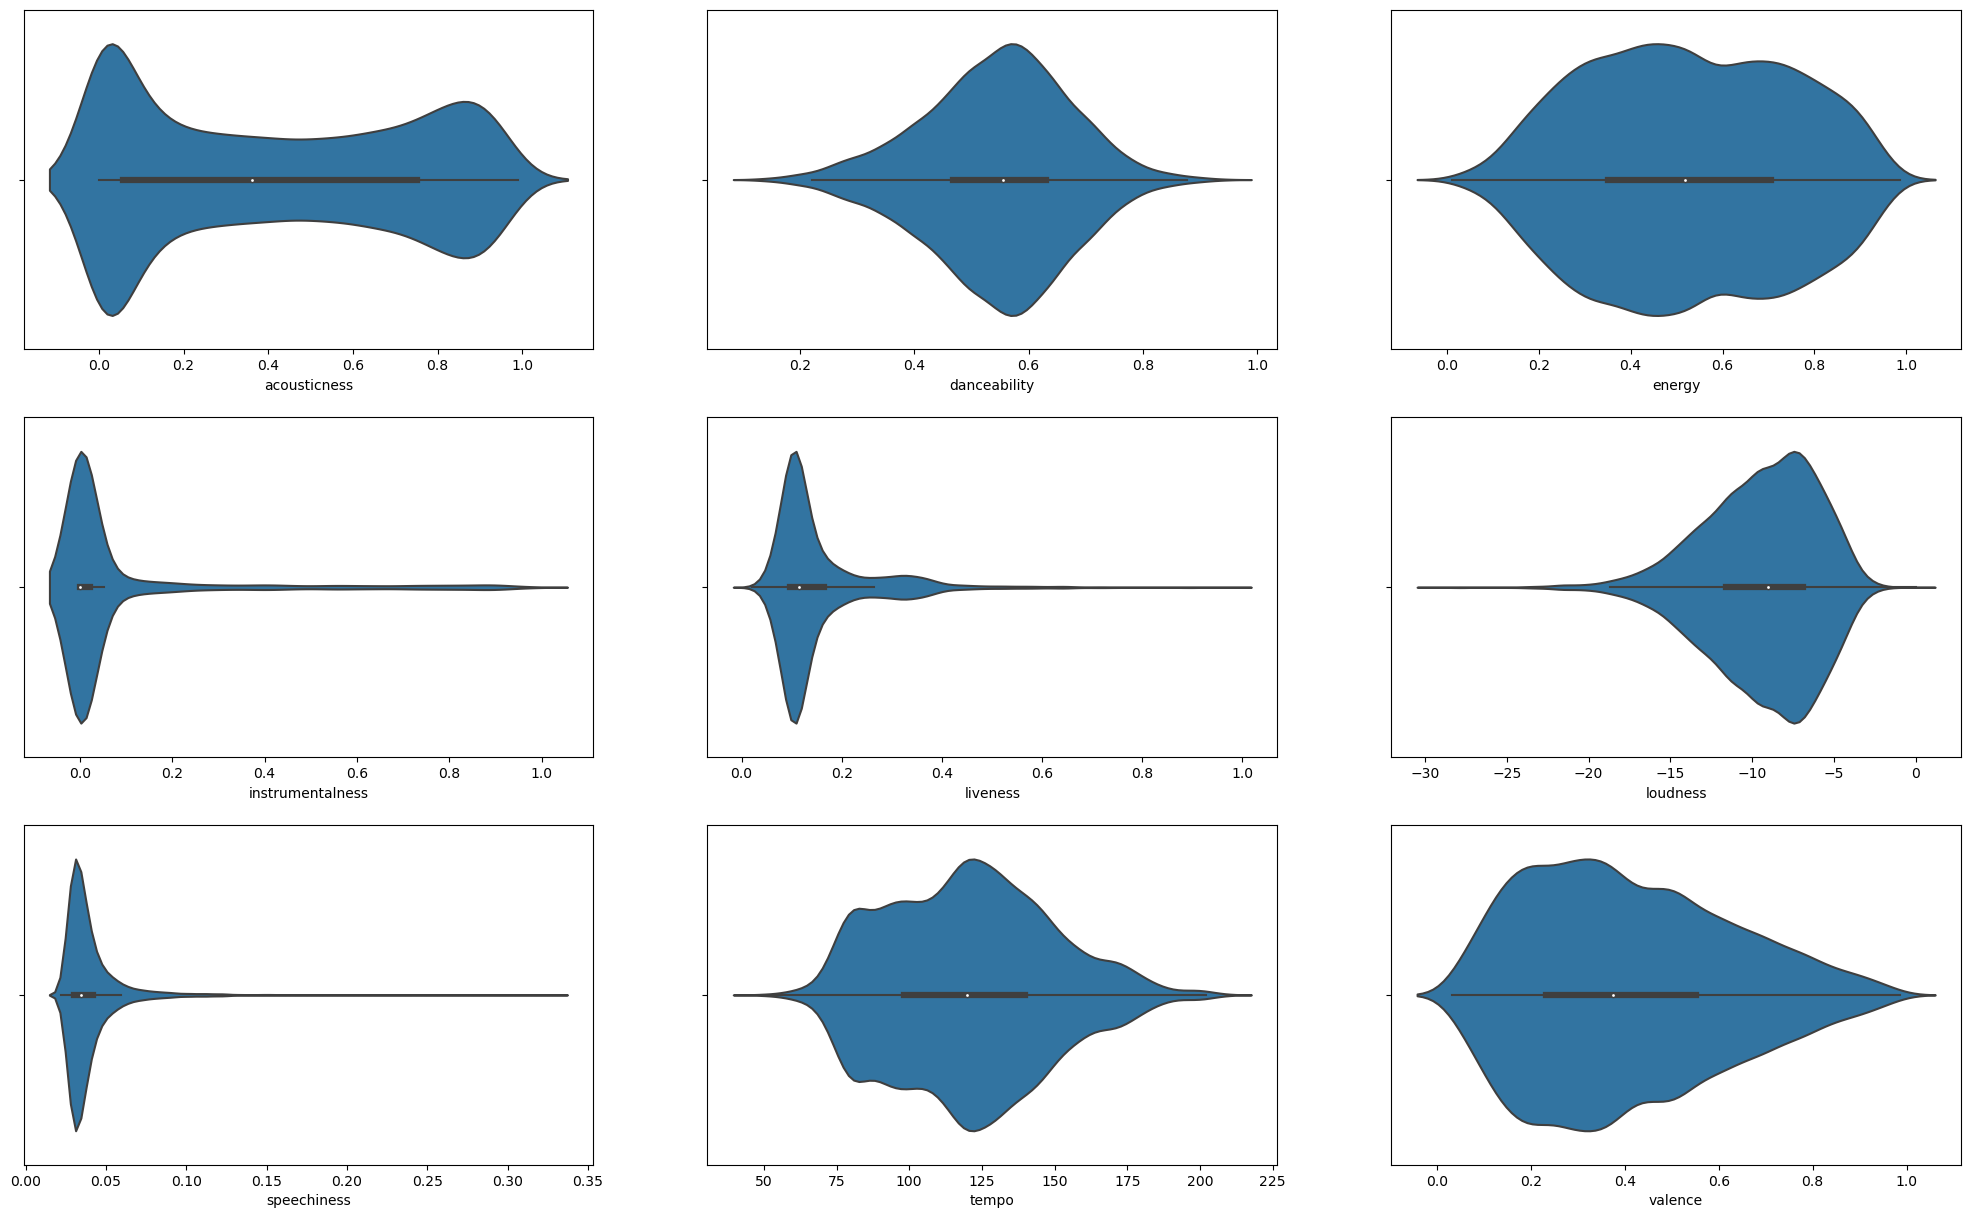

In [31]:
data_for_plotting = df
PLOTS_PER_ROW=3
audio_feat = ['acousticness', 
              'danceability',
              'energy',
              'instrumentalness',
              'liveness',
              'loudness',
              'speechiness',
              'tempo',
              'valence']

plot_multiple_hist(data_for_plotting, audio_feat, PLOTS_PER_ROW)
plot_multiple_violin(data_for_plotting, audio_feat, PLOTS_PER_ROW)

## 3b. Analyzing Audio Feature Correlations
**Positive Correlation**:
- Energy & Loudness (0.8) - The higher energy the song is, the louder it is. 
- Valence & Energy (0.51), Danceability (0.45), and Loudness (0.42) - Happy songs tend to be higher energy, louder, and you are more likely to dance to. 

**Negative Correlation**: 
- Acousticness & Energy (-0.8), Loudness (-0.7), and Valence (-0.39) - Acoustic songs have lower energy and are quieter. They may also be more sad or depressed. 


<AxesSubplot:>

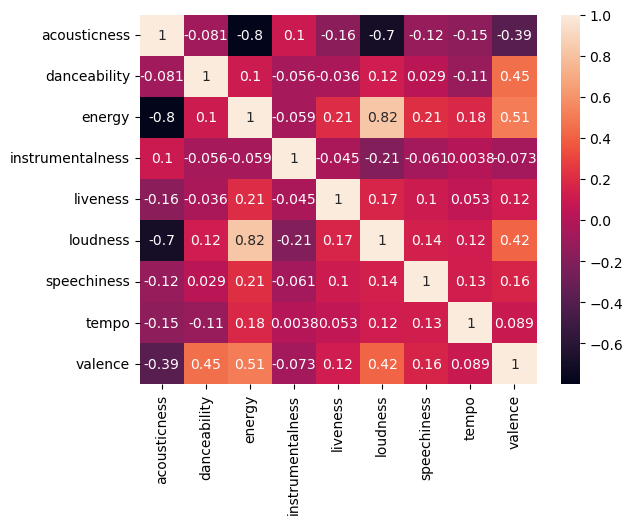

In [32]:
# get the correlation
audio_feat_w_playlist = ['playlist',
                          'acousticness', 
                          'danceability',
                          'energy',
                          'instrumentalness',
                          'liveness',
                          'loudness',
                          'speechiness',
                          'tempo',
                          'valence']
sns.heatmap(df[audio_feat_w_playlist].corr(), annot = True)

## **3c. Analyzing Audio Features Over Time (2016 - 2022)**

AlexRainBirdMusic's signature playlist is his monthly compilations. He has playlists from January 2017 until present. Each month, he releases a compilation of songs for the same genres (ex. Alt/Indie/Pop or Indie/Pop/Folk). 

**Preparation**
- Using regex, I extracted the time (ex. January 2020) from the playlist name and converted it to datetime 
    - For the playlists with no months, I extracted the year (ex. 2023) 

**Hypothesis**:
- Energy and Danceability scores will be higher (higher likelihood) in the summer months because:
        1) Songs that are more popular in the summer tend to be more upbeat 
        2) There tend to be more parties and events in the summer which typically is accompanied by dancey songs
- Valence scores will be lower (more likely to be melancholic) in the Fall and Winter since those periods are associated with seasonal affective disorder  
- Instrumentalness, Speechiness, and Liveness will remain consistent across the periods 

**Insights**:
- Overall, there does not appear to be a signficant change in the audio feature scores over time
- Danceability and Valence followed very similar patterns with sharper increases in July which may be due to the mood shift in the warmer months
- Energy was the highest in January - these does not appear to be a clear reason why. 
- Valence was higher in the Spring and Summer seasons versus Winter which provides some support to our initial hypothesis 
- Instrumentalness, Speechiness, and Liveness remained consistent across the periods
- When analyzing the average monthly feature scores, we see acousticness rise steadily from September to December with a high spike in February. 
 

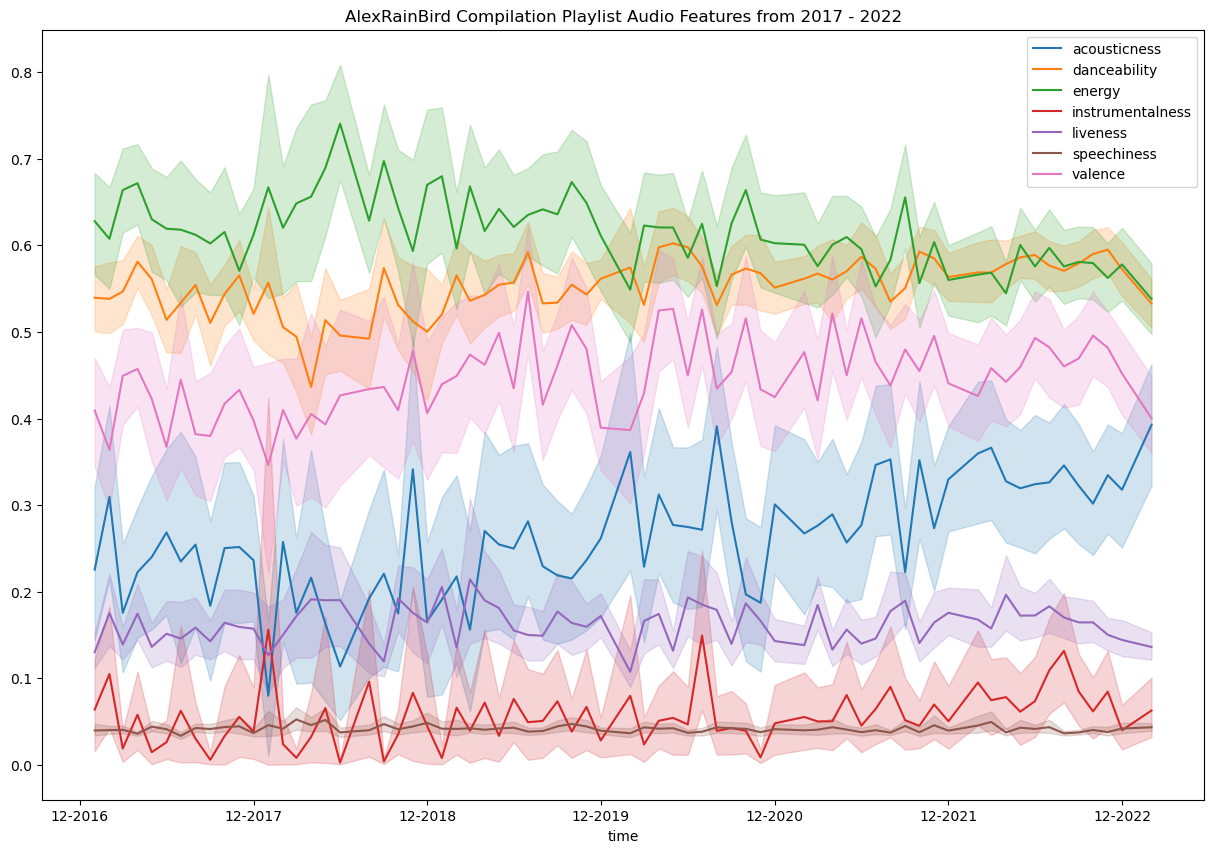

In [33]:
#plotting all compilation song audio features 

compilation_df = df[df['compilation'].str.contains('compilation', na = False)]

data_for_plotting = compilation_df
audio_feat = ['acousticness', 
              'danceability',
              'energy',
              'instrumentalness',
              'liveness',
              'speechiness',
              'valence']

plot_linechart(data_for_plotting, audio_feat, "AlexRainBird Compilation Playlist Audio Features from 2017 - 2022", 12)

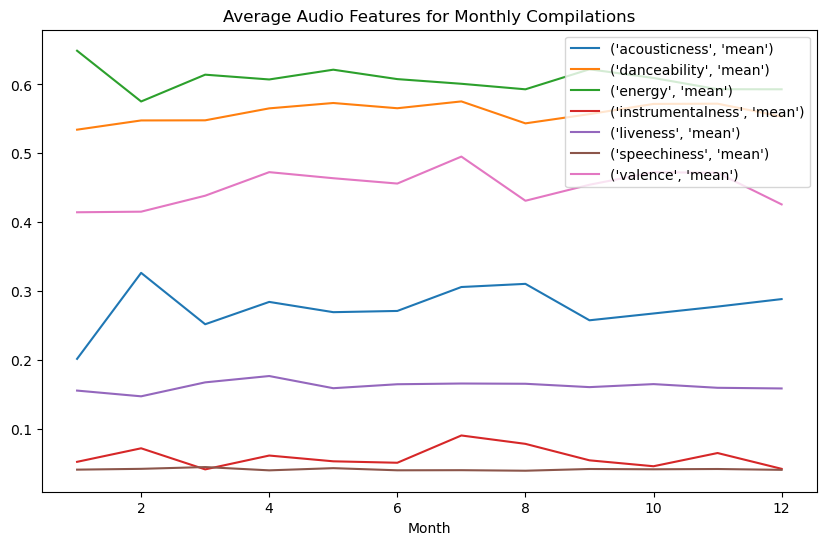

In [34]:
# plotting average features by month
compilation_df = df[df['compilation'].str.contains('compilation', na = False)]
data_for_plotting = compilation_df.groupby(['month'])[audio_feat].agg(['mean'])

plt.figure(figsize = (10,6))
plt.plot(data_for_plotting)
plt.legend(data_for_plotting.columns, loc="upper right")
plt.title('Average Audio Features for Monthly Compilations')
plt.xlabel('Month')

plt.show()

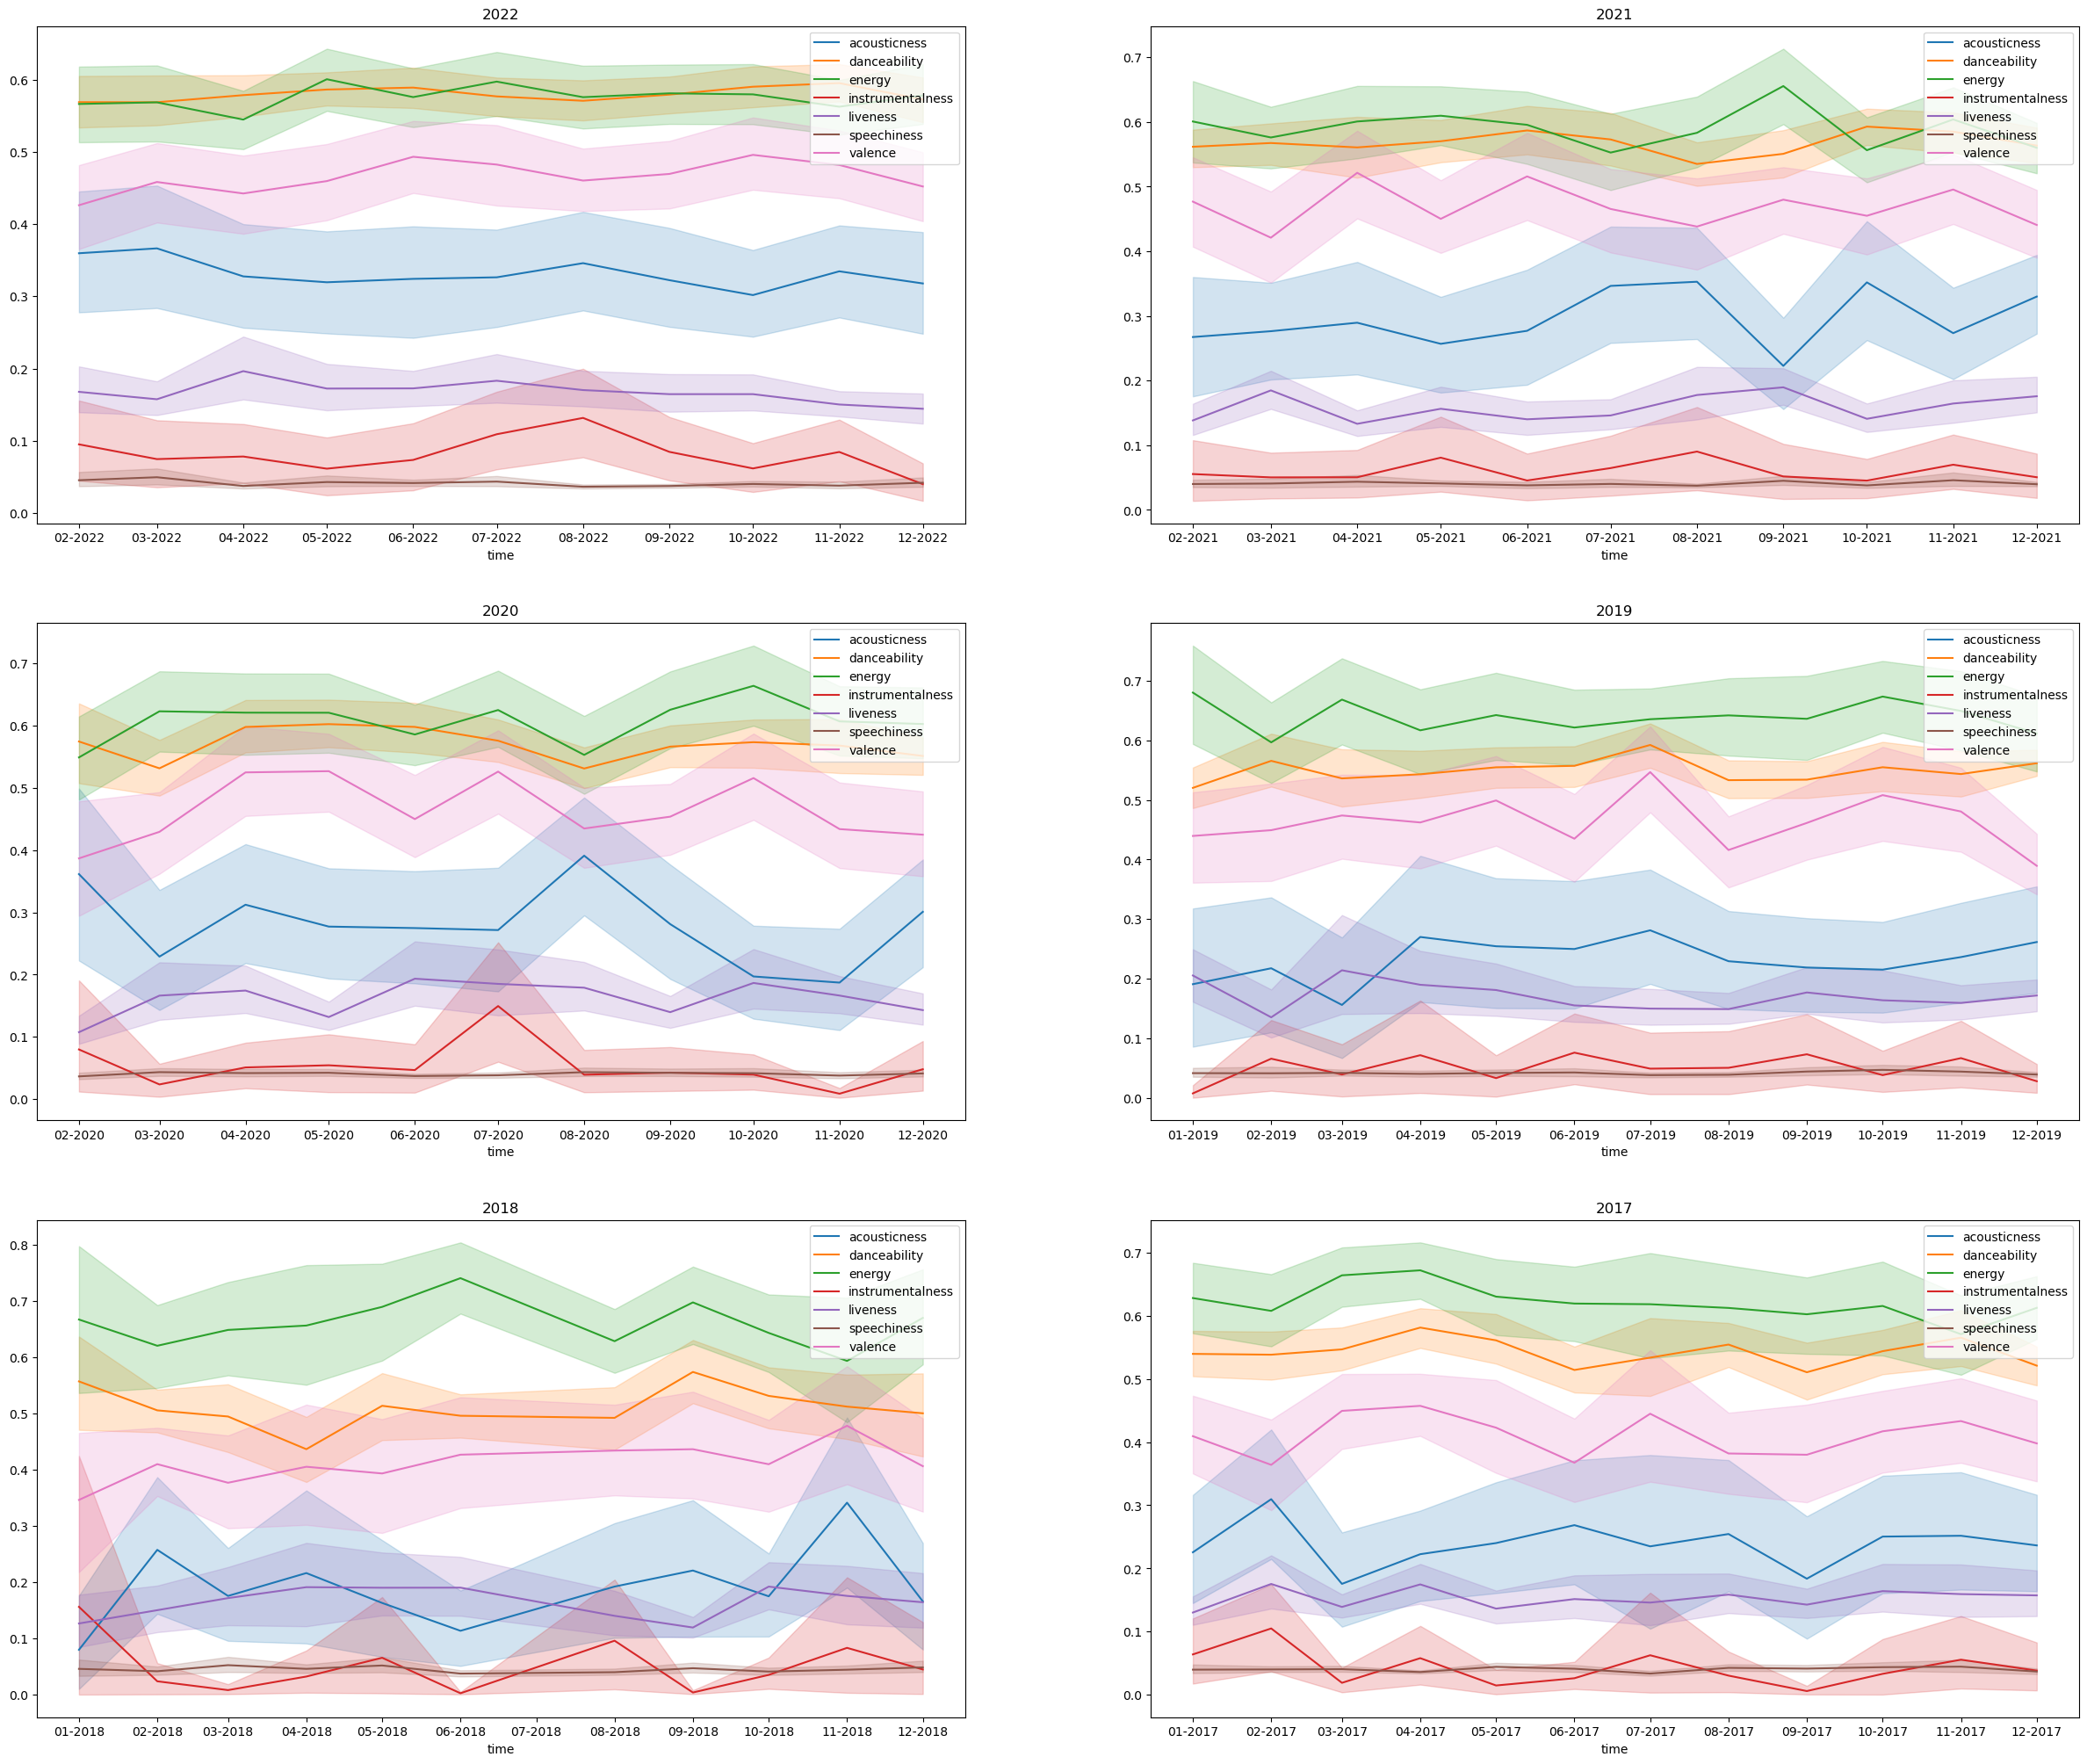

In [35]:
# plotting compilation data by year except for 2023 

num_years = compilation_df.year.unique().astype(int).tolist()[1:] #we do not have enough data for 2023
audio_feat = ['acousticness', 
              'danceability',
              'energy',
              'instrumentalness',
              'liveness',
              'speechiness',
              'valence']
import math
i,j=0,0
PLOTS_PER_ROW = 2
fig, ax = plt.subplots(math.ceil(len(num_years)/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(30, 25))
for year in num_years:
    for feat in audio_feat:
        data_for_plotting = compilation_df[compilation_df['year']==year]
        f = sns.lineplot(ax = ax[i,j],x = "time", y = feat, data = data_for_plotting, label = feat)
        f.set_ylabel("")
        f.set_title(f'{year}')
        date_form = DateFormatter("%m-%Y")
        f.xaxis.set_major_formatter(date_form)
        f.xaxis.set_major_locator(mdates.MonthLocator(interval=1)) #set the label to show monthly data 
        f.legend(loc='upper right')
    j+=1
    if j%PLOTS_PER_ROW==0:
        i+=1
        j=0
plt.show()

## 3d. Comparing Audio Features by Genres

To compare the audio features by genres, I calculated the average of the audio features for all songs that were on playlists with a certain genre (alt, folk, indie, rock, pop). 

Because the playlists' genres are blended (ex. Indie/Pop/Folk or Alt/Indie/Rock) there will be some overlap in the data however, this still gave me an idea of subtle differences in audio feature scores by genre. 

- **Acousticness** - Folk, Pop, and Indie had higher scores for acoustic songs
- **Danceability** - This feature remained the same across all genres at around 0.54
- **Energy** - Rock and Alt had the highest energy scores with an almost 50% higher score than Pop and Folk. 
- **Instrumentalness** - This feature remained the same across all genres at around 0.06. 
- **Liveness** - This feature remained the same across all genres at around 0.15.
- **Speechiness** - This feature remained the same across all genres at around 0.04.
- **Valence** - Rock and Alt had higher valence scores indicating happier, more upbeat songs.

In [36]:
# count how many rows do not have genres (from spotify) vs from the genre extracted from the playlist title 
df[(df['artist_genres'].str.contains('unknown')) & (df['genre'].notna())]['artist_genres'].shape

(3843,)

In [37]:
# for the artist_genres with missing genres, inpute these values with the genres based on the playlist 

genres_not_na = df[(df['artist_genres'].str.contains('unknown')) & (df['genre'].notna())]['genre']
genres_not_na = '[' + genres_not_na + ']'


mask = (df['artist_genres'].str.contains('unknown')) & (df['genre'].notna())
df.loc[mask, 'artist_genres']= genres_not_na


In [38]:
# set up genres and audio dictionary 
genres = ['alt', 'folk', 'indie', 'rock', 'pop']
audio_dict = dict.fromkeys(audio_feat)
genres_dict = dict.fromkeys(genres, audio_dict)

# calculate the average for audio feature by genre
x = {genre: {feature: df[df['genre'].str.contains(genre, na = False)][feature].mean() for feature in audio_feat} for genre in genres} 

# convert to dataframe
genre_audio_df = pd.DataFrame(x).reset_index().rename(columns = {'index': 'features'})
#pd.melt(genre_audio_df, id_vars = 'genres', var_name = 'audio_features', value_name = 'score') <- use this to plot bargraph 
genre_audio_df

,features,alt,folk,indie,rock,pop
0,acousticness,0.169479,0.567814,0.408096,0.148686,0.500894
1,danceability,0.545827,0.540708,0.546500,0.552843,0.551139
2,energy,0.672011,0.425793,0.526716,0.686794,0.468887
3,instrumentalness,0.073966,0.080856,0.073790,0.067758,0.061238
4,liveness,0.171011,0.143382,0.153977,0.173072,0.146990
5,speechiness,0.042011,0.038402,0.039951,0.043126,0.039459
6,valence,0.475351,0.350904,0.405149,0.497721,0.379429


In [39]:
y = {genre: {feature: df[df['genre']== genre][feature].mean() for feature in audio_feat} for genre in genres} 
pd.DataFrame(y).transpose().reset_index().rename(columns = {'index': 'genres'})

,genres,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
0,alt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,folk,0.674558,0.545991,0.369742,0.053882,0.145535,0.040757,0.368523
2,indie,0.361939,0.552791,0.569588,0.049757,0.156276,0.042659,0.435488
3,rock,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN


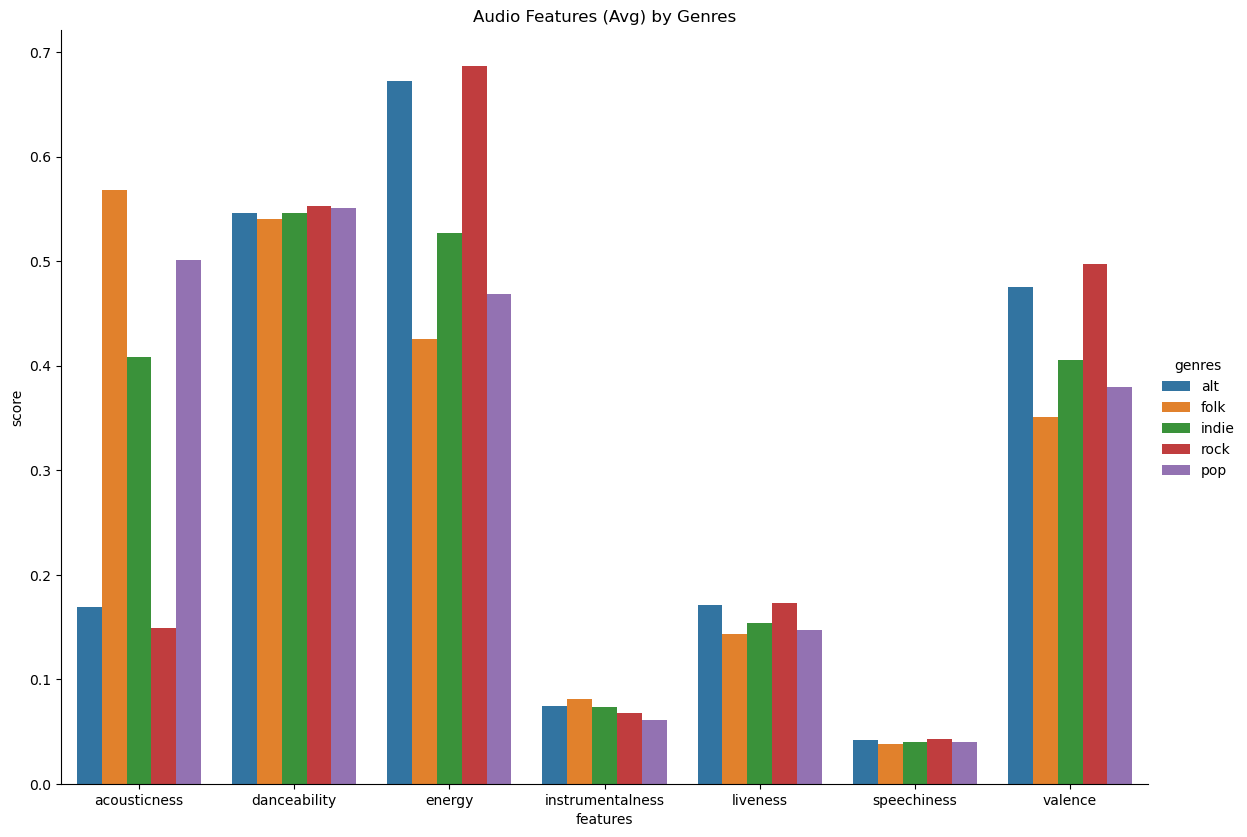

In [40]:
# plot audio feature average by genres

data_for_plotting = pd.melt(genre_audio_df, id_vars = 'features', var_name = 'genres', value_name = 'score')
audio_feat = ['acousticness', 
              'danceability',
              'energy',
              'instrumentalness',
              'liveness',
              'speechiness',
              'valence']

sns.factorplot(x='features', y='score', hue='genres', data=data_for_plotting, 
               kind='bar',height=8.27, aspect=11.7/8.27).set(title = 'Audio Features (Avg) by Genres')
plt.show()

## 3e. Comparing Audio Features by Seasons

To compare the audio features by seasons, I calculated the average of the audio features for all songs that were on playlists labeled as a season either based on their timing (ex. February 2020 is Winter and June 2020 is Summer) or name (ex.Indie/Indie-Folk Compilation - Spring 2022 🌼 (alexrainbirdMusic)). 

I was hoping that there would be changes in the audio feature scores based on the seasons. My hypothesis was that Fall and Winter seasons will have lower valence scores indicating moodier and sadder songs whereas in the Summer, there would be more upbeat and happy songs. 

**Results**:
- The audio features stayed roughly the same throughout the seasons. There was a slight dip in scores in the Winter with the exception of Acousticnes. 

There does not appear to be a strong correlation between seasons and audio features.

In [41]:
# set up genres and audio dictionary 
seasons = ['spring', 'summer', 'winter', 'fall']
audio_dict = dict.fromkeys(audio_feat)
seasons_dict = dict.fromkeys(seasons, audio_dict)

# calculate the average for audio feature by genre
x = {season: {feature: df[df['season2'].str.contains(season, na = False)][feature].mean() for feature in audio_feat} for season in seasons} 

# convert to dataframe
seasons_audio_df = pd.DataFrame(x).reset_index().rename(columns = {'index': 'features'})
#pd.melt(genre_audio_df, id_vars = 'genres', var_name = 'audio_features', value_name = 'score') <- use this to plot bargraph 
seasons_audio_df

,features,spring,summer,winter,fall
0,acousticness,0.268525,0.295917,0.295951,0.267720
1,danceability,0.562231,0.560497,0.548637,0.566957
2,energy,0.614416,0.600326,0.591257,0.608042
3,instrumentalness,0.051941,0.072815,0.056914,0.055159
4,liveness,0.167680,0.165511,0.153293,0.161925
5,speechiness,0.042688,0.039911,0.041433,0.041821
6,valence,0.458337,0.458903,0.419803,0.466350


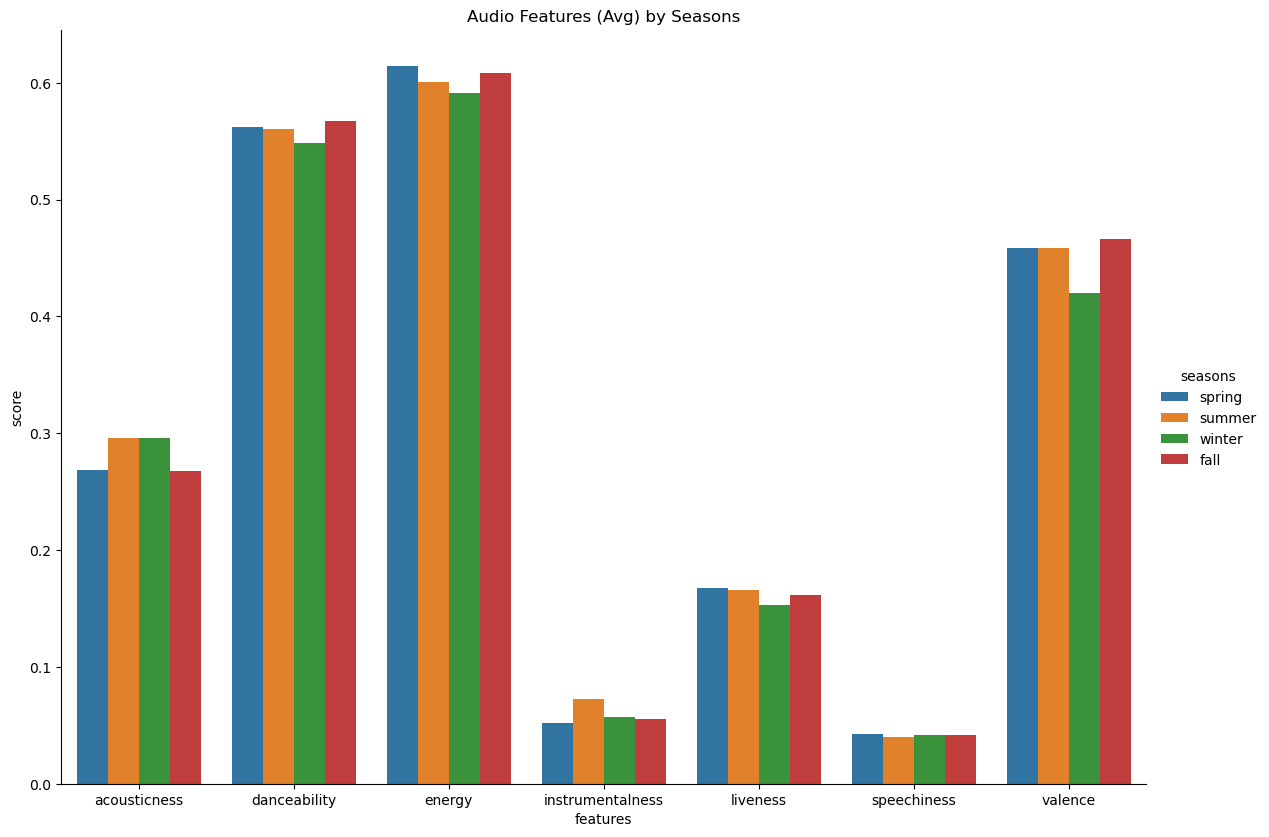

In [42]:
# plot audio feature average by features 

data_for_plotting = pd.melt(seasons_audio_df, id_vars = 'features', var_name = 'seasons', value_name = 'score')
audio_feat = ['acousticness', 
              'danceability',
              'energy',
              'instrumentalness',
              'liveness',
              'speechiness',
              'valence']

sns.factorplot(x='features', y='score', hue='seasons', data=data_for_plotting, 
               kind='bar',height=8.27, aspect=11.7/8.27).set(title = 'Audio Features (Avg) by Seasons')
plt.show()

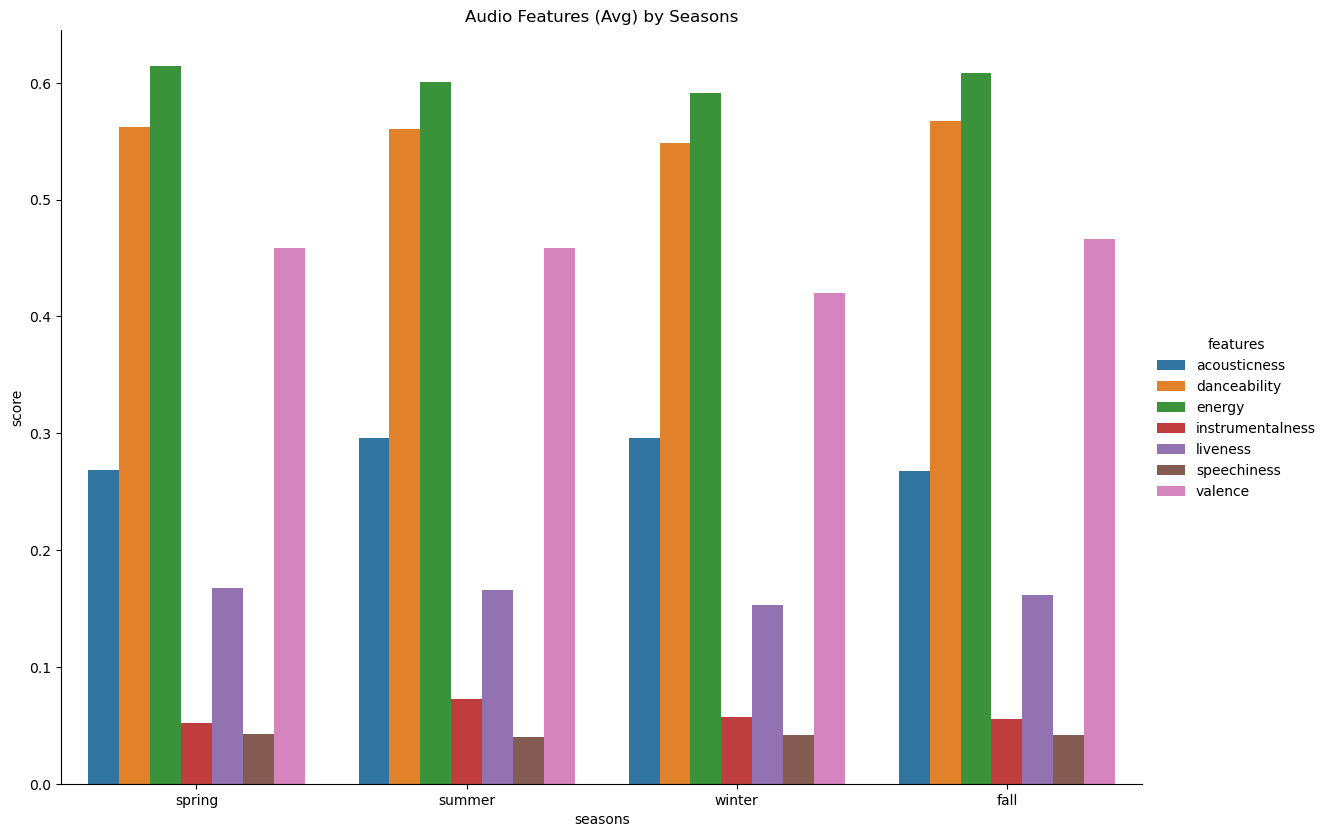

In [43]:
# plot audio feature average by seasons

data_for_plotting = pd.melt(seasons_audio_df, id_vars = 'features', var_name = 'seasons', value_name = 'score')
audio_feat = ['acousticness', 
              'danceability',
              'energy',
              'instrumentalness',
              'liveness',
              'speechiness',
              'valence']

sns.factorplot(x='seasons', y='score', hue='features', data=data_for_plotting, 
               kind='bar',height=8.27, aspect=11.7/8.27).set(title = 'Audio Features (Avg) by Seasons')
plt.show()

# EDA Summary

- **Audio Features Distribution**
    - Objective: Explore the distribution of the audio features for the track data. 
        - Across all playlists, most playlist had tracks that:
            - Are not acoustic
            - Are both danceable and not danceable
            - Have higher energy
            - Have vocals
            - Are not performed live
            - Are loud
            - Have both slow and fast tempo
            - Do not have high presence of spoken word
            - Are both sad and happy  
- **Audio Features Correlation**
    - Objective: Analyze the correlation between audio features.
        - Positive Correlation: 
            - Energy & Loudness
            - Valence & Energy
            - Valence & Danceability
            - Valence * Loudness
        - Negative Correlation: 
            - Acousticness & Energy
            - Acousticness & Loudness
            - Acousticness & Valence 
- **Over Time (2016 to 2022)**
    - Objective: Analyze how audio features fluctuate over time based on the month and year data of the compilation playlists.
        - There was not a signficant difference in average audio features across the months and years. 
- **Comparison by Genres**
    - Objective: Compare the audio features across the genres.
        - Alt & Rock had the highest Energy and Valence scores
        - Folk, Pop, & Indie had higher scores for acoustic songs
        - Instrumentalness, Liveness, Speechiness were similiar across all genres 
- **Comparison by Seasons**
    - Objective: Compare the audio features across the seasons. 
        - There was not a signficant difference in average audio features across the seasons.


# END